<a href="https://colab.research.google.com/github/tanmay-kalbande/Lead-Quality-Prediction/blob/main/Client_Project_PM_PR_0019(Sales_Effectiveness).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project

Client: Sales Effectiveness | Category: Product Sales


# Problem Statement:

FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  

Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

# Business Case: Predicting the lead category whether it is High Potential or Low Potential for sales.

# Project Goal:

1. Data exploration insights – Sales effectiveness.

2. ML model to predict the Lead Category (High Potential , Low Potential).

In [ ]:
# Importing Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 783.0 kB/s eta 0:00:00


In [ ]:
!pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 82.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247951 sha256=fc6d25544469498e51462cf5073ecbc65ec92d90e849ce90a997fb9433f0e459
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [ ]:
import os
import mysql.connector

In [ ]:
# Making connections to database server:

connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  )

In [ ]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [ ]:
# Connecting the database
Connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [ ]:
db_tables=pd.read_sql_query('show tables',Connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [ ]:
# Loading data from SQL server:
query='select * from data'
data=pd.read_sql(query,Connection)

In [ ]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis:

Lead is basically an individaul who might be the customer or an entity as a potential buyer of a product or service (business opportunities) but currently is not.

Created : Date and time when lead was created.

Product_ID : Unique Id for each product which company is selling.

Source : The Platform from where the lead was generated.

Mobile : Contact number of lead.

EMAIL : Email Id of lead.

Sales_Agent : Agent who has created the lead or working on the lead.

Location : Location of lead.

Delivery_Mode : Mode via which lead has requested the product.

Status: Current status of lead.

As per the business problem given i.e to categorize new lead as High or low potential lead. We have following categories for Status (Target) variable.

Open: Lead is open and interaction is going on.

Potential: Lead can be converted into customer.

In Progress Positive: Lead is in process of conversion into customer.

Not Responding: Sales agent has called the lead but he/she is not responding.

Just Enquiry: The person is not interested in buying the product now.

Junk Lead: Leads who are not qualified to purchase products are called as junk leads.

CONVERTED: Lead has been converted into customer.

In Progress Negative: Earlier lead was interested to buy the product but now not interested.

LOST: The lead is lost.

Long Term: Leads that are within a one or two sales cycle time frame of closing.

# Basic Checks:

In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [ ]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [ ]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [ ]:
data.shape

(7422, 9)

In [ ]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [ ]:
# Checking null values:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [ ]:
# Here we do not have any null values in the given dataset.

In [ ]:
# Count of Target variable
data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [ ]:
# Count of features
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [ ]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [ ]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [ ]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

# Exploratory Data Analysis (EDA):

In [ ]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [ ]:
# Dropping unwanted variables because it contains unspecified values
data.drop(['Mobile','EMAIL'],axis=1,inplace=True)

In [ ]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,Sales-Agent-10,,Mode-5,Open


In [ ]:
# We have to set date and time in right form for the model so it will work efficiently

In [ ]:
data['Created']=pd.to_datetime(data.Created)

In [ ]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open


In [ ]:
# Here we create new columns from date-time  for day,month,year,hour,minute,weekday to get more accurate results

In [ ]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [ ]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Minute
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,14,11,10,5
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,22
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,21
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,8,46
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,7,34


In [ ]:
# Now we drop Created variable
data.drop(['Created'],axis=1,inplace=True)

In [ ]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Minute
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,10,5
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,22
2,,Website,Sales-Agent-10,,Mode-5,Open,14,11,9,21
3,,Website,Sales-Agent-10,,Mode-5,Open,14,11,8,46
4,,Website,Sales-Agent-10,,Mode-5,Open,14,11,7,34


# Univariate Analysis:

Here we use sweetviz report for univariate analysis of variables.

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 82.3 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
My_report=sv.analyze(data)
My_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights for variables by using Sweetviz report:

For Product Id variable we can see maximum values are for 18 number product Id.

From Source Call we can see highest number of lead.

For Sales Agent 4 we have 20% of the lead.

Maximum Leads are from other locations like Kolkata, Howrah, Trivandrum.

For Delivery mode 5 and mode 1 has highest leads.

For target variable as Status we can say that maximum status of lead is for Junk lead.

In [ ]:
# Analysing Products
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [ ]:
# Checking unique values
data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [ ]:
data.Product_ID.replace(['25','21','2','12','26','14','11','22','3','17','6','8','13','24','16','23','0','28','7','4'],
                        'less sell',inplace=True)

In [ ]:
data.Product_ID.sort_values()

0                
2727             
2729             
4979             
2556             
          ...    
5796    less sell
5843    less sell
5849    less sell
5854    less sell
7421    less sell
Name: Product_ID, Length: 7422, dtype: object

In [ ]:
data.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [ ]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.replace('By Recommendation','Customer Referral',inplace=True)
data.replace(['US Website','Just Dial'],'Website',inplace=True)
data.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)
data.Source.value_counts()

Live Chat            2677
Call                 2547
Website              1787
Customer Referral     212
Existing Customer     146
Campaign               36
                       17
Name: Source, dtype: int64

In [ ]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [ ]:
# Defining Status as High Potential or Low Potential by considering all the given values.
data.Status.replace(['Potential','In Progress Positive','converted','CONVERTED','Open','Long Term'],'High_Potential',inplace=True)
data.Status.replace(['Not Responding','Just Enquiry','Junk Lead','In Progress Negative','LOST'],'Low_Potential',inplace=True)

In [ ]:
data.Status.value_counts()

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

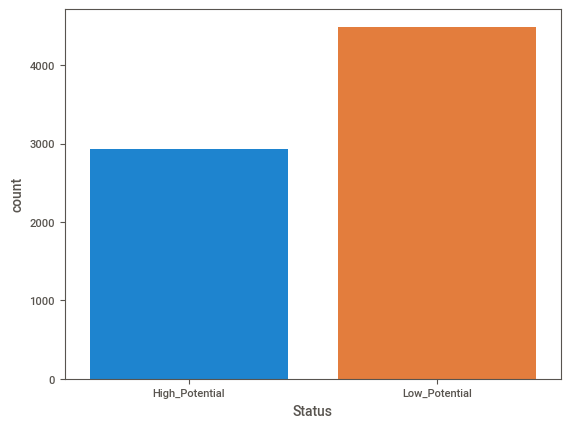

In [ ]:
# Plotting count of Status variable
sns.countplot(x="Status",data=data)

In [ ]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [ ]:
# Defining Location variable
data.Location.replace(['UAE','UK','USA','Singapore','AUSTRALIA', 'EUROPE', 'Malaysia'],'Foreign_Country',inplace=True)
data.Location.replace(['Trivandrum','Kolkata','Howrah'],'Other Locations',inplace=True)

In [ ]:
data.Location.value_counts()

Other Locations    2614
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Foreign_Country     214
Pune                142
                     58
Name: Location, dtype: int64

In [ ]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Day              0
Month            0
Hour             0
Minute           0
dtype: int64

In [ ]:
# Dropping missing values present in few rows
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

In [ ]:
data.shape

(7328, 10)

In [ ]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Hour,Minute
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,High_Potential,13,11,18,51
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,High_Potential,13,11,18,48
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,High_Potential,13,11,17,9
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low_Potential,13,11,16,49
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,High_Potential,13,11,16,37


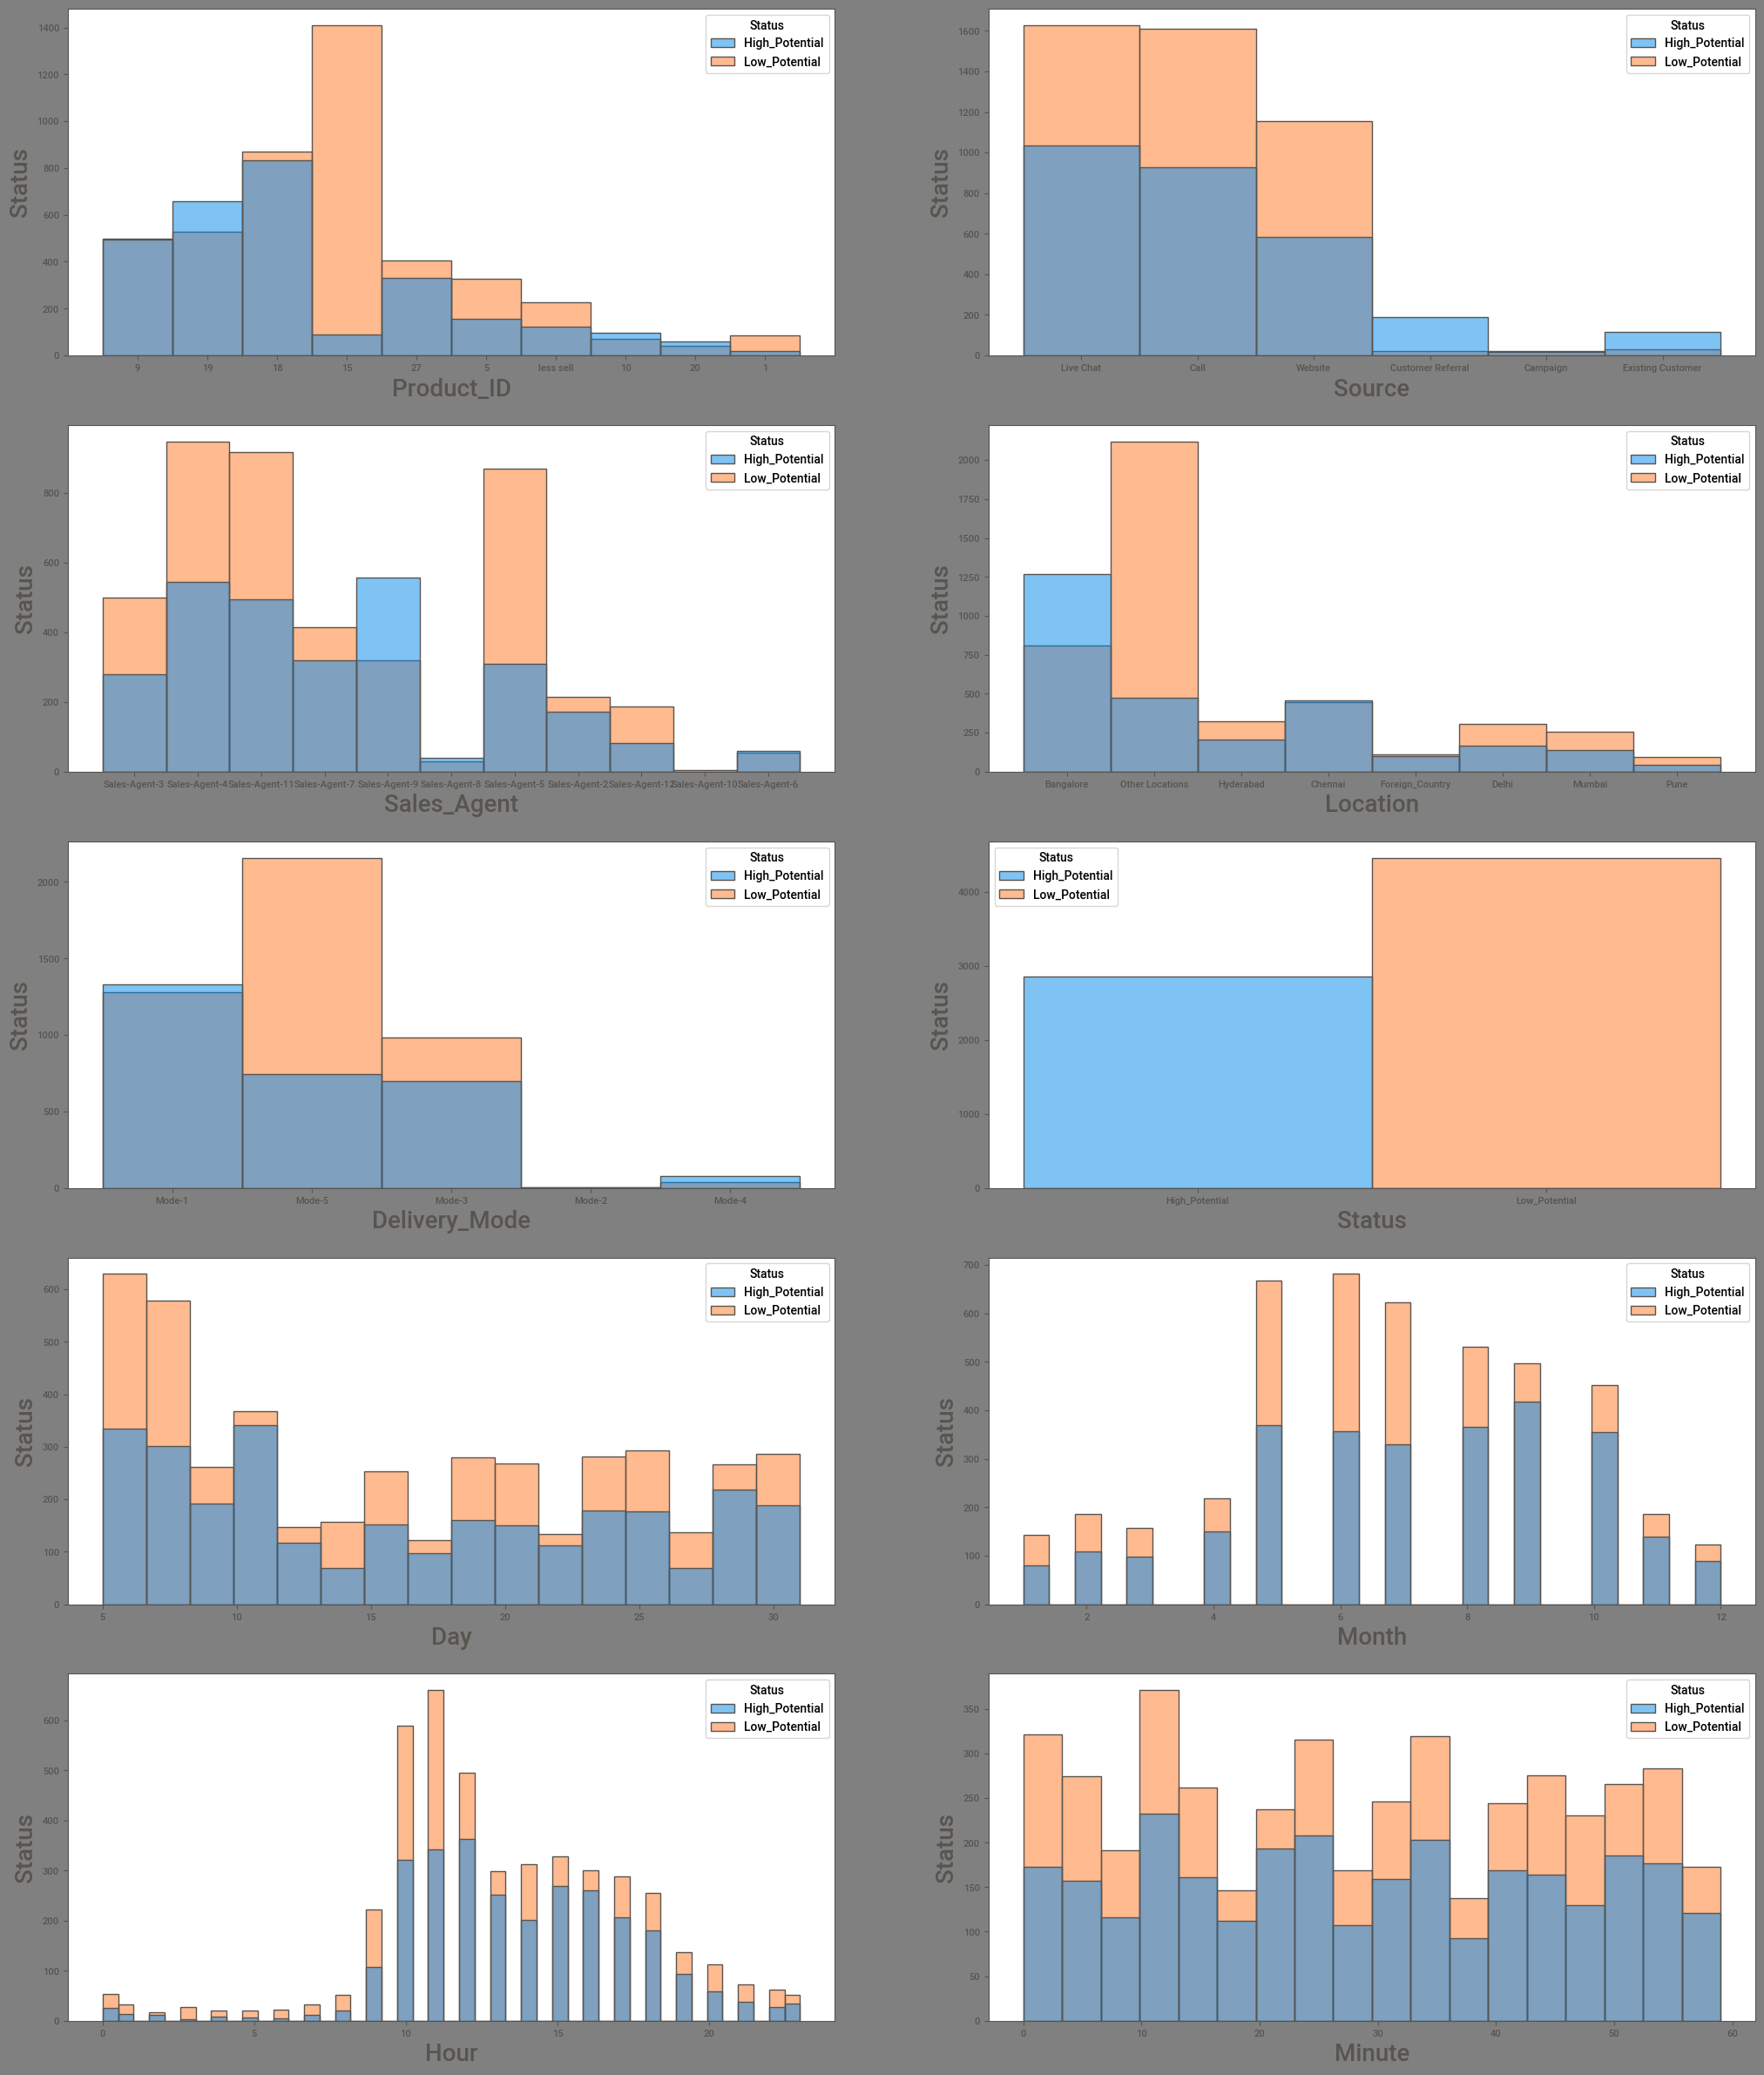

In [ ]:
# Plotting histogram for variables

plt.figure(figsize=(25,30), facecolor='grey')
plotnumber = 1

for column in data:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column],hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.show()

# Conclusions:

From the above graphical representation we have following conclusions:

For Product ID 15 has highest number of Non potential lead.

For Delivery_Mode Mode-1 has only Potential Lead and Mode-4 also but having less amount of deliveries from Mode-4.

There are most number of lead from Other Locations.

For Sales_Agent 4,5 and 11 provides maximum number of lead but most of them are Non potential.

From Source Call, Live Chat-Direct and Website we are getting highest number of lead.


# Handling Categorical variables:

In [ ]:
# Converting Source using Frequency encoder
# grouping by frequency
fq = data.groupby('Source').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Source')] = data['Source'].map(fq)
# drop original column.
data = data.drop(['Source'], axis = 1)

In [ ]:
data.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [ ]:
# Handling Sales_Agent using Label Encoder.
data.replace({'Sales-Agent-1': 1, 'Sales-Agent-2': 2, 'Sales-Agent-3': 3, 'Sales-Agent-4': 4, 'Sales-Agent-5': 5, 'Sales-Agent-6': 6, 'Sales-Agent-7': 7,'Sales-Agent-8': 8,'Sales-Agent-9': 9,'Sales-Agent-10': 10,'Sales-Agent-11': 11,'Sales-Agent-12': 12},inplace=True)

In [ ]:
# Converting Location using Frequency encoder

fq1 = data.groupby('Location').size()/len(data)
# mapping values to dataframe
data.loc[:, "{}_freq_encode".format('Location')] = data['Location'].map(fq1)
# drop original column.
data = data.drop(['Location'], axis = 1)

In [ ]:
# As Delivery_Mode is Nominal Categorical data we will perform One Hot Encoding

Delivery_Mode = data[["Delivery_Mode"]]

Delivery_Mode = pd.get_dummies(Delivery_Mode)

data = pd.concat([data,Delivery_Mode],axis=1)

In [ ]:
data.drop(['Delivery_Mode'], axis =1, inplace= True)

In [ ]:
# Converting Status variable
data.replace({'Low_Potential': 0, 'High_Potential': 1}, inplace = True)

In [ ]:
data.Product_ID.replace({'less sell': 1}, inplace=True)

In [ ]:
data['Product_ID']=data['Product_ID'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            7328 non-null   int64  
 1   Sales_Agent           7328 non-null   int64  
 2   Status                7328 non-null   int64  
 3   Day                   7328 non-null   int64  
 4   Month                 7328 non-null   int64  
 5   Hour                  7328 non-null   int64  
 6   Minute                7328 non-null   int64  
 7   Source_freq_encode    7328 non-null   float64
 8   Location_freq_encode  7328 non-null   float64
 9   Delivery_Mode_Mode-1  7328 non-null   uint8  
 10  Delivery_Mode_Mode-2  7328 non-null   uint8  
 11  Delivery_Mode_Mode-3  7328 non-null   uint8  
 12  Delivery_Mode_Mode-4  7328 non-null   uint8  
 13  Delivery_Mode_Mode-5  7328 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 551.2 KB


In [ ]:
data

,Product_ID,Sales_Agent,Status,Day,Month,Hour,Minute,Source_freq_encode,Location_freq_encode,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,9,3,1,13,11,18,51,0.363401,0.283706,1,0,0,0,0
1,19,4,1,13,11,18,48,0.346070,0.354121,0,0,0,0,1
2,18,11,1,13,11,17,9,0.236900,0.354121,1,0,0,0,0
3,15,7,0,13,11,16,49,0.236900,0.071916,1,0,0,0,0
4,18,7,1,13,11,16,37,0.346070,0.283706,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,9,6,0,28,4,9,45,0.346070,0.054449,0,0,0,1,0
7324,15,12,0,28,4,9,43,0.346070,0.354121,0,0,0,0,1
7325,5,11,0,28,4,9,20,0.363401,0.283706,1,0,0,0,0
7326,1,4,0,28,4,8,4,0.019787,0.354121,1,0,0,0,0


In [ ]:
# Plotting Boxplot for each variable.

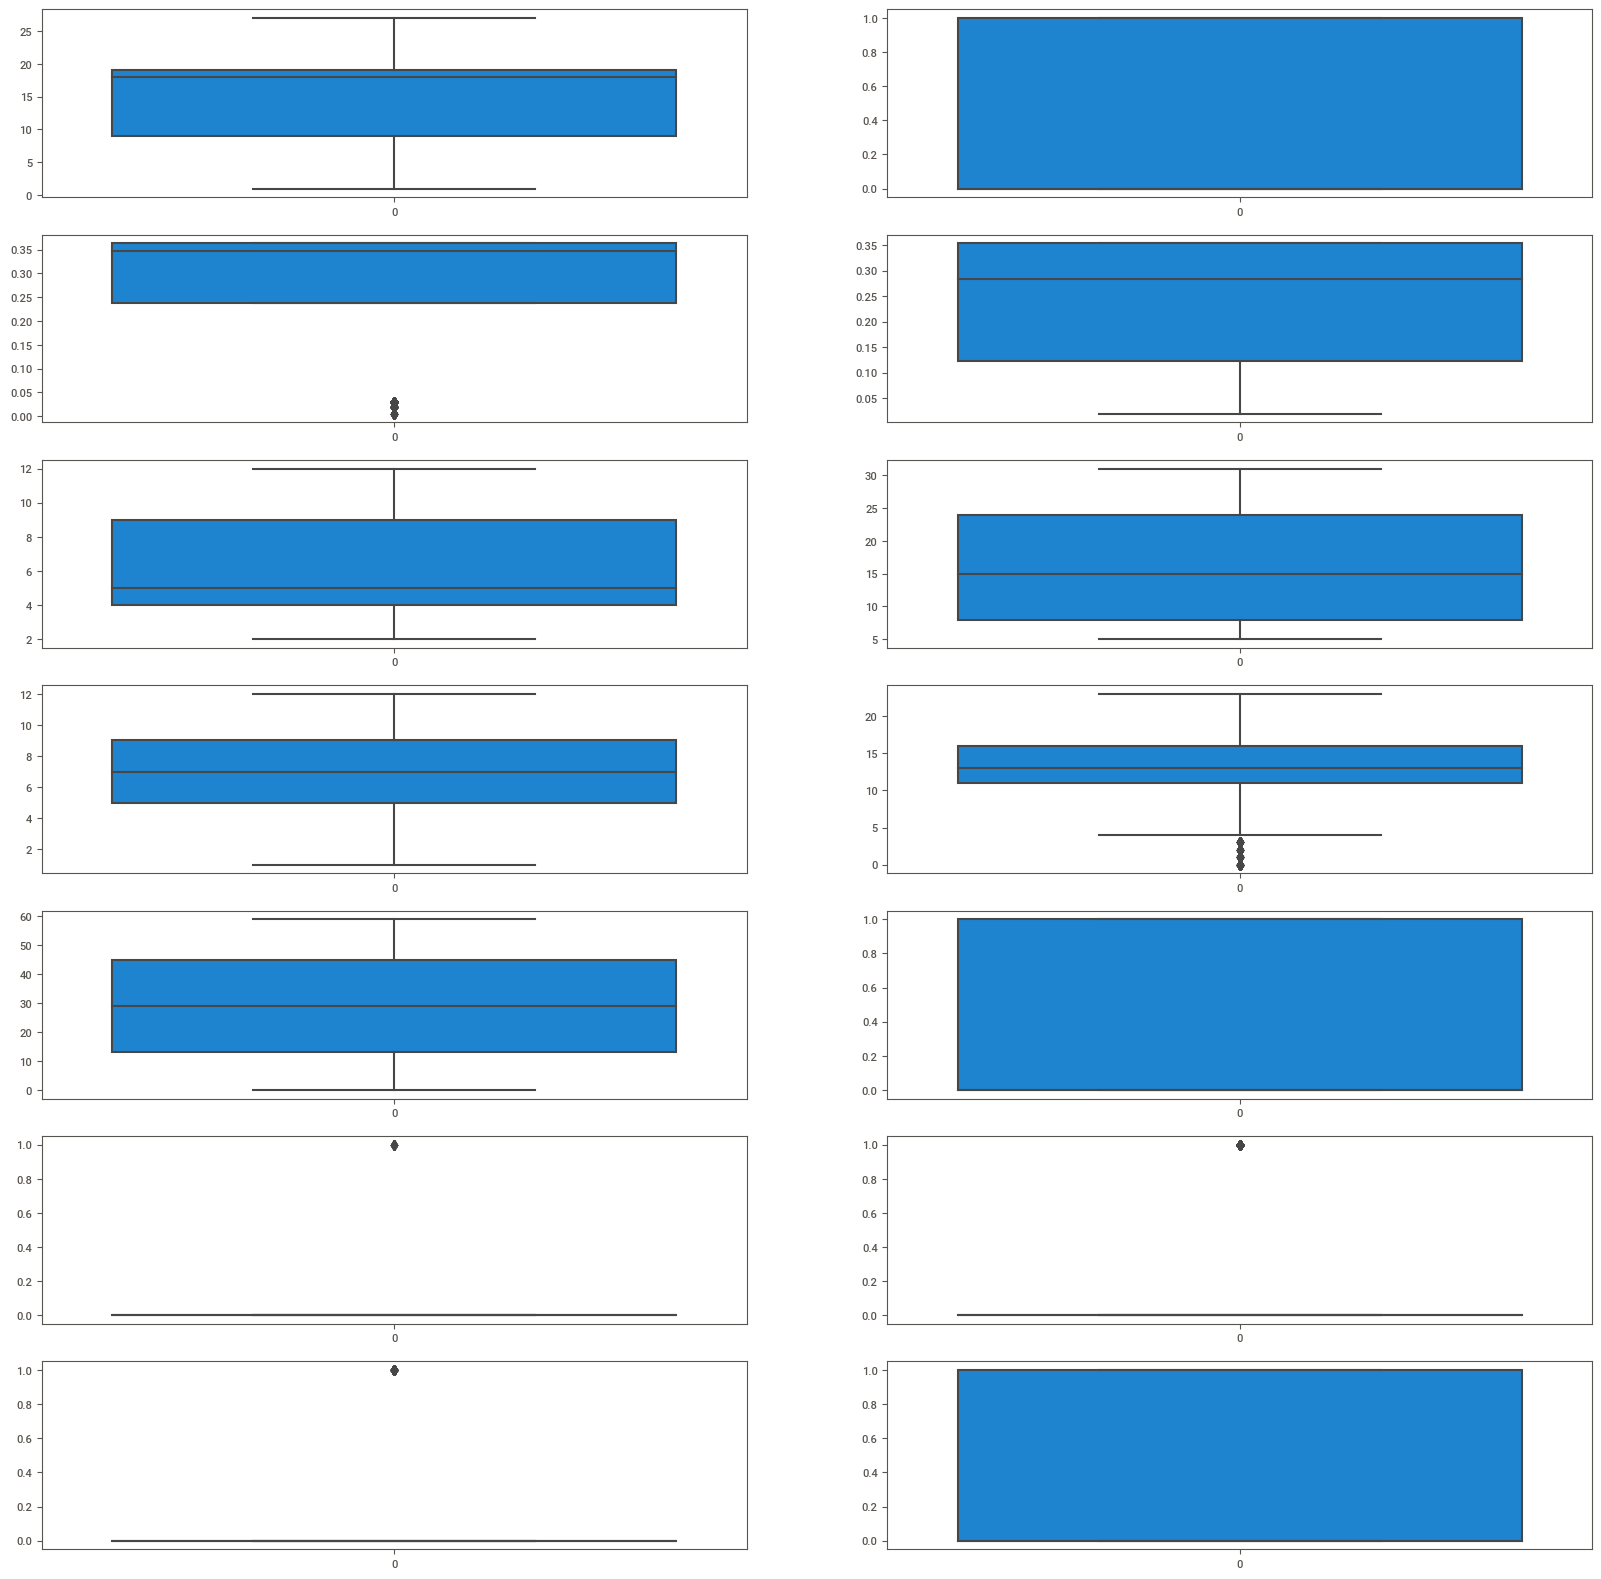

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(7,2,1)
sns.boxplot(data['Product_ID'])
plt.subplot(7,2,2)
sns.boxplot(data['Status'])
plt.subplot(7,2,3)
sns.boxplot(data['Source_freq_encode'])
plt.subplot(7,2,4)
sns.boxplot(data['Location_freq_encode'])
plt.subplot(7,2,5)
sns.boxplot(data['Sales_Agent'])
plt.subplot(7,2,6)
sns.boxplot(data['Day'])
plt.subplot(7,2,7)
sns.boxplot(data['Month'])
plt.subplot(7,2,8)
sns.boxplot(data['Hour'])
plt.subplot(7,2,9)
sns.boxplot(data['Minute'])
plt.subplot(7,2,10)
sns.boxplot(data['Delivery_Mode_Mode-1'])
plt.subplot(7,2,11)
sns.boxplot(data['Delivery_Mode_Mode-2'])
plt.subplot(7,2,12)
sns.boxplot(data['Delivery_Mode_Mode-3'])
plt.subplot(7,2,13)
sns.boxplot(data['Delivery_Mode_Mode-4'])
plt.subplot(7,2,14)
sns.boxplot(data['Delivery_Mode_Mode-5'])

plt.show()

# Feature Selection:

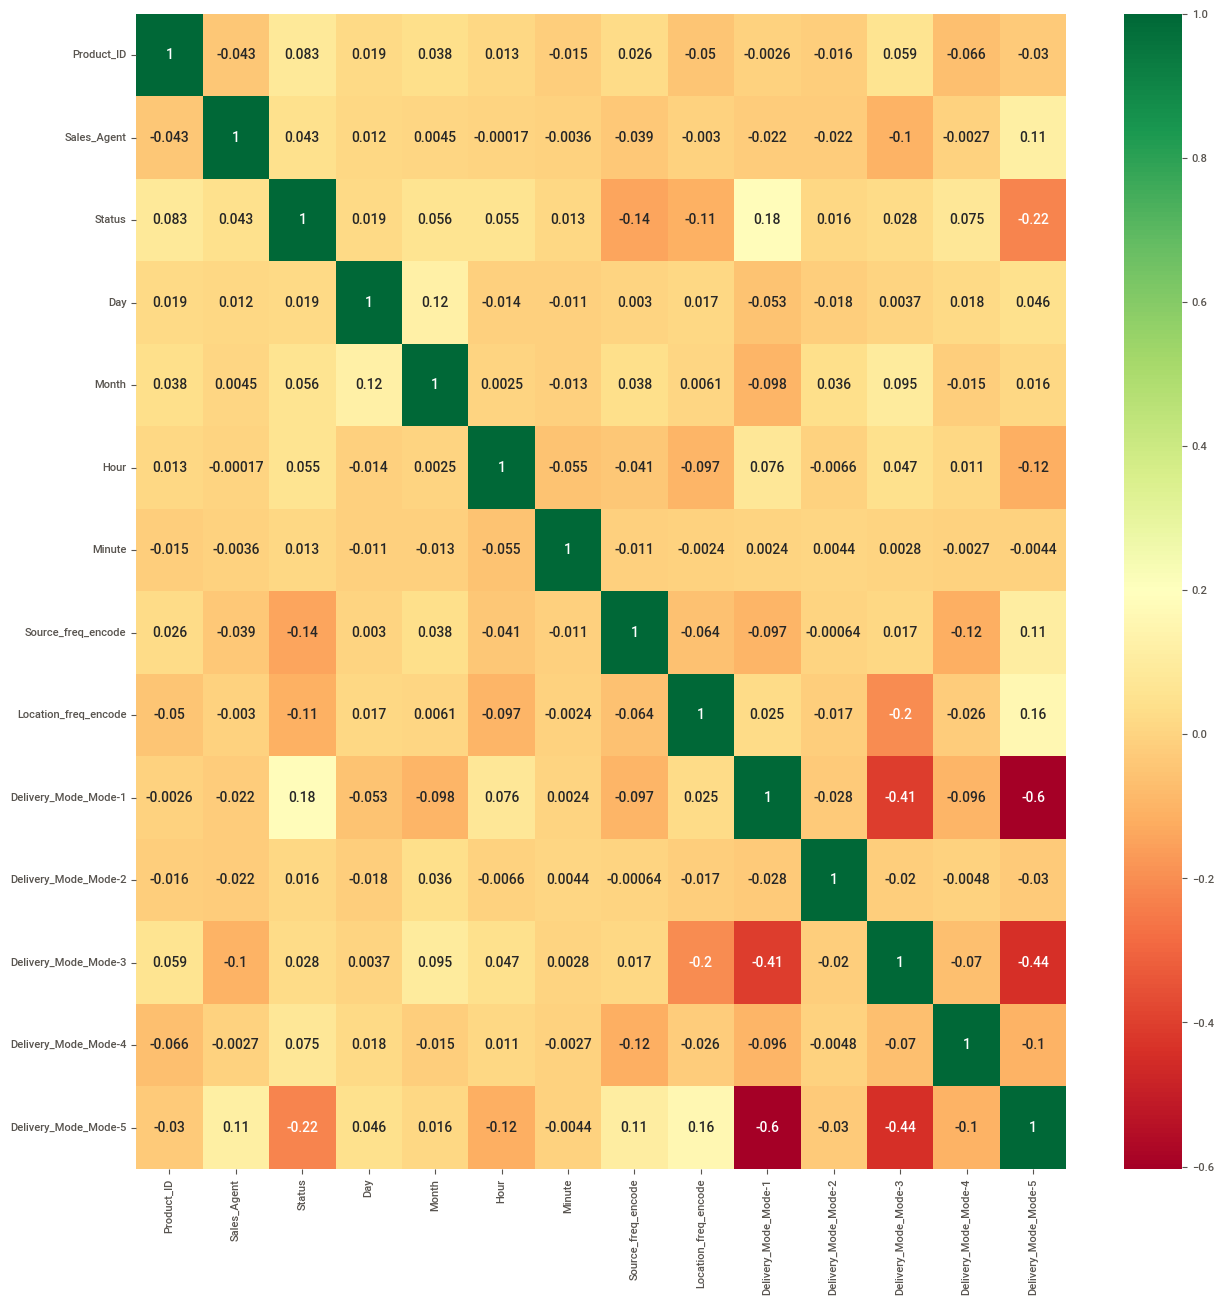

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
data.isnull().sum()

Product_ID              0
Sales_Agent             0
Status                  0
Day                     0
Month                   0
Hour                    0
Minute                  0
Source_freq_encode      0
Location_freq_encode    0
Delivery_Mode_Mode-1    0
Delivery_Mode_Mode-2    0
Delivery_Mode_Mode-3    0
Delivery_Mode_Mode-4    0
Delivery_Mode_Mode-5    0
dtype: int64

In [ ]:
# Checking dataset

data['Status'].value_counts()

0    4466
1    2862
Name: Status, dtype: int64

<Axes: ylabel='count'>

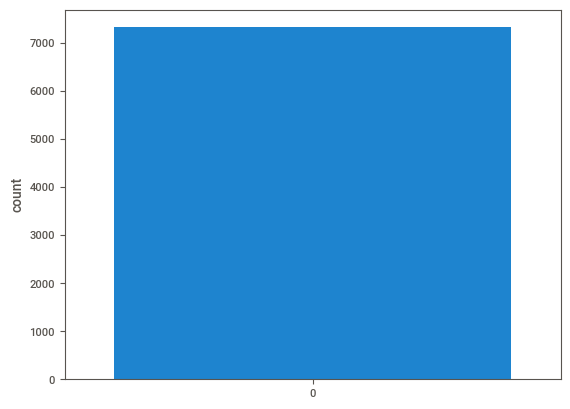

In [ ]:
sns.countplot(data['Status'])

In [ ]:
# Creation of Model

from sklearn.model_selection import train_test_split
X=data.drop('Status',axis=1)
y=data['Status']

In [ ]:
# Handling Imbalanced Dataset
from collections import Counter
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class
X_sm,Y_sm=sm.fit_resample(X,y)#applying sampling on target variable
print(Counter(Y_sm))# checking count after sampling for  each class

Counter({0: 4466, 1: 2862})
Counter({1: 4466, 0: 4466})


In [ ]:
# Preparing Train and Test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.25,random_state=42)

# 1. Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = Log_Reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1110
           1       0.70      0.65      0.67      1123

    accuracy                           0.68      2233
   macro avg       0.68      0.68      0.68      2233
weighted avg       0.68      0.68      0.68      2233



In [ ]:
from sklearn.metrics import roc_auc_score

Score=roc_auc_score(y_test,y_pred)
Score

0.6822451124321115

In [ ]:
from sklearn.model_selection import cross_val_score
Scores = cross_val_score(Log_Reg,X_sm,Y_sm,cv=5,scoring='roc_auc')
print(Scores)
print("Cross Validation Score:",Scores.mean())
print("Std :",Scores.std())

[0.68845056 0.60666419 0.76243873 0.85839972 0.77228011]
Cross Validation Score: 0.7376466614236057
Std : 0.08481991339742809


# Conclusion by using Logistic Regression:

From the above output of Logistic Regression we have following results:

Accuracy is 0.68, Precision is 0.68, Recall is 0.68 and f1-score is 0.67.

ROC and AUC score is 0.6773.

Cross Validation Score is 0.7389.

# 2. Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')
Decision_Tree.fit(X_sm,Y_sm)
y_hat=Decision_Tree.predict(x_test)
y_hat

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Evalauting the model

from sklearn.metrics import accuracy_score,classification_report,f1_score

y_train_predict=Decision_Tree.predict(x_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

0.7736975668010151

In [ ]:
print(classification_report(y_train,y_train_predict))  # For training data

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3356
           1       0.78      0.77      0.77      3343

    accuracy                           0.77      6699
   macro avg       0.77      0.77      0.77      6699
weighted avg       0.77      0.77      0.77      6699



In [ ]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
Status,,
0,2624,732
1,784,2559


In [ ]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.7714802532408803

In [ ]:
#f1 score for test data
test_f1=f1_score(y_test,y_hat)
test_f1

0.7678410117434508

In [ ]:
print(classification_report(y_test,y_hat)) # For  testing data

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1110
           1       0.78      0.76      0.77      1123

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [ ]:
pd.crosstab(y_test,y_hat)# Confusion Matrix for test data

col_0,0,1
Status,,
0,869,241
1,273,850


# Conclusion by using Decision Tree Classifier:

From the above output of Decision Tree Classifier we have following results:

Accuracy for decision tree clissifier is 0.78, Precision is 0.78, Recall is 0.78 and f1-score is 0.78.

# Hyperparameter Tuning for Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)


tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [ ]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
tree_cv.best_score_  # Best score from cv

0.7340691140428802

In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')

In [ ]:
dt1.fit(x_train,y_train)  #Traing model with best parameter

DecisionTreeClassifier(max_depth=1)

In [ ]:
y_hat1=dt1.predict(x_test)  #Predicting
y_hat1

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
acc_test=accuracy_score(y_test,y_hat1) #Checking accuracy
acc_test

0.683833407971339

In [ ]:
test_f1=f1_score(y_test,y_hat1)    #f1_score
test_f1

0.7359760658189977

In [ ]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61      1110
           1       0.63      0.88      0.74      1123

    accuracy                           0.68      2233
   macro avg       0.72      0.68      0.67      2233
weighted avg       0.71      0.68      0.67      2233



[Text(0.618527324879227, 0.9545454545454546, 'x[7] <= 0.294\nentropy = 1.0\nsamples = 8932\nvalue = [4466, 4466]'),
 Text(0.3599411231884058, 0.8636363636363636, 'x[7] <= 0.078\nentropy = 0.962\nsamples = 6076\nvalue = [2346, 3730]'),
 Text(0.20569142512077296, 0.7727272727272727, 'x[12] <= 0.055\nentropy = 0.987\nsamples = 1926\nvalue = [1090, 836]'),
 Text(0.11903683574879227, 0.6818181818181818, 'x[8] <= 0.321\nentropy = 1.0\nsamples = 1327\nvalue = [676, 651]'),
 Text(0.036382850241545896, 0.5909090909090909, 'x[10] <= 0.771\nentropy = 0.997\nsamples = 908\nvalue = [424, 484]'),
 Text(0.013285024154589372, 0.5, 'x[11] <= 0.136\nentropy = 0.539\nsamples = 154\nvalue = [19, 135]'),
 Text(0.004830917874396135, 0.4090909090909091, 'x[9] <= 0.368\nentropy = 0.127\nsamples = 114\nvalue = [2, 112]'),
 Text(0.0024154589371980675, 0.3181818181818182, 'entropy = 0.0\nsamples = 109\nvalue = [0, 109]'),
 Text(0.007246376811594203, 0.3181818181818182, 'x[3] <= 10.783\nentropy = 0.971\nsamples =

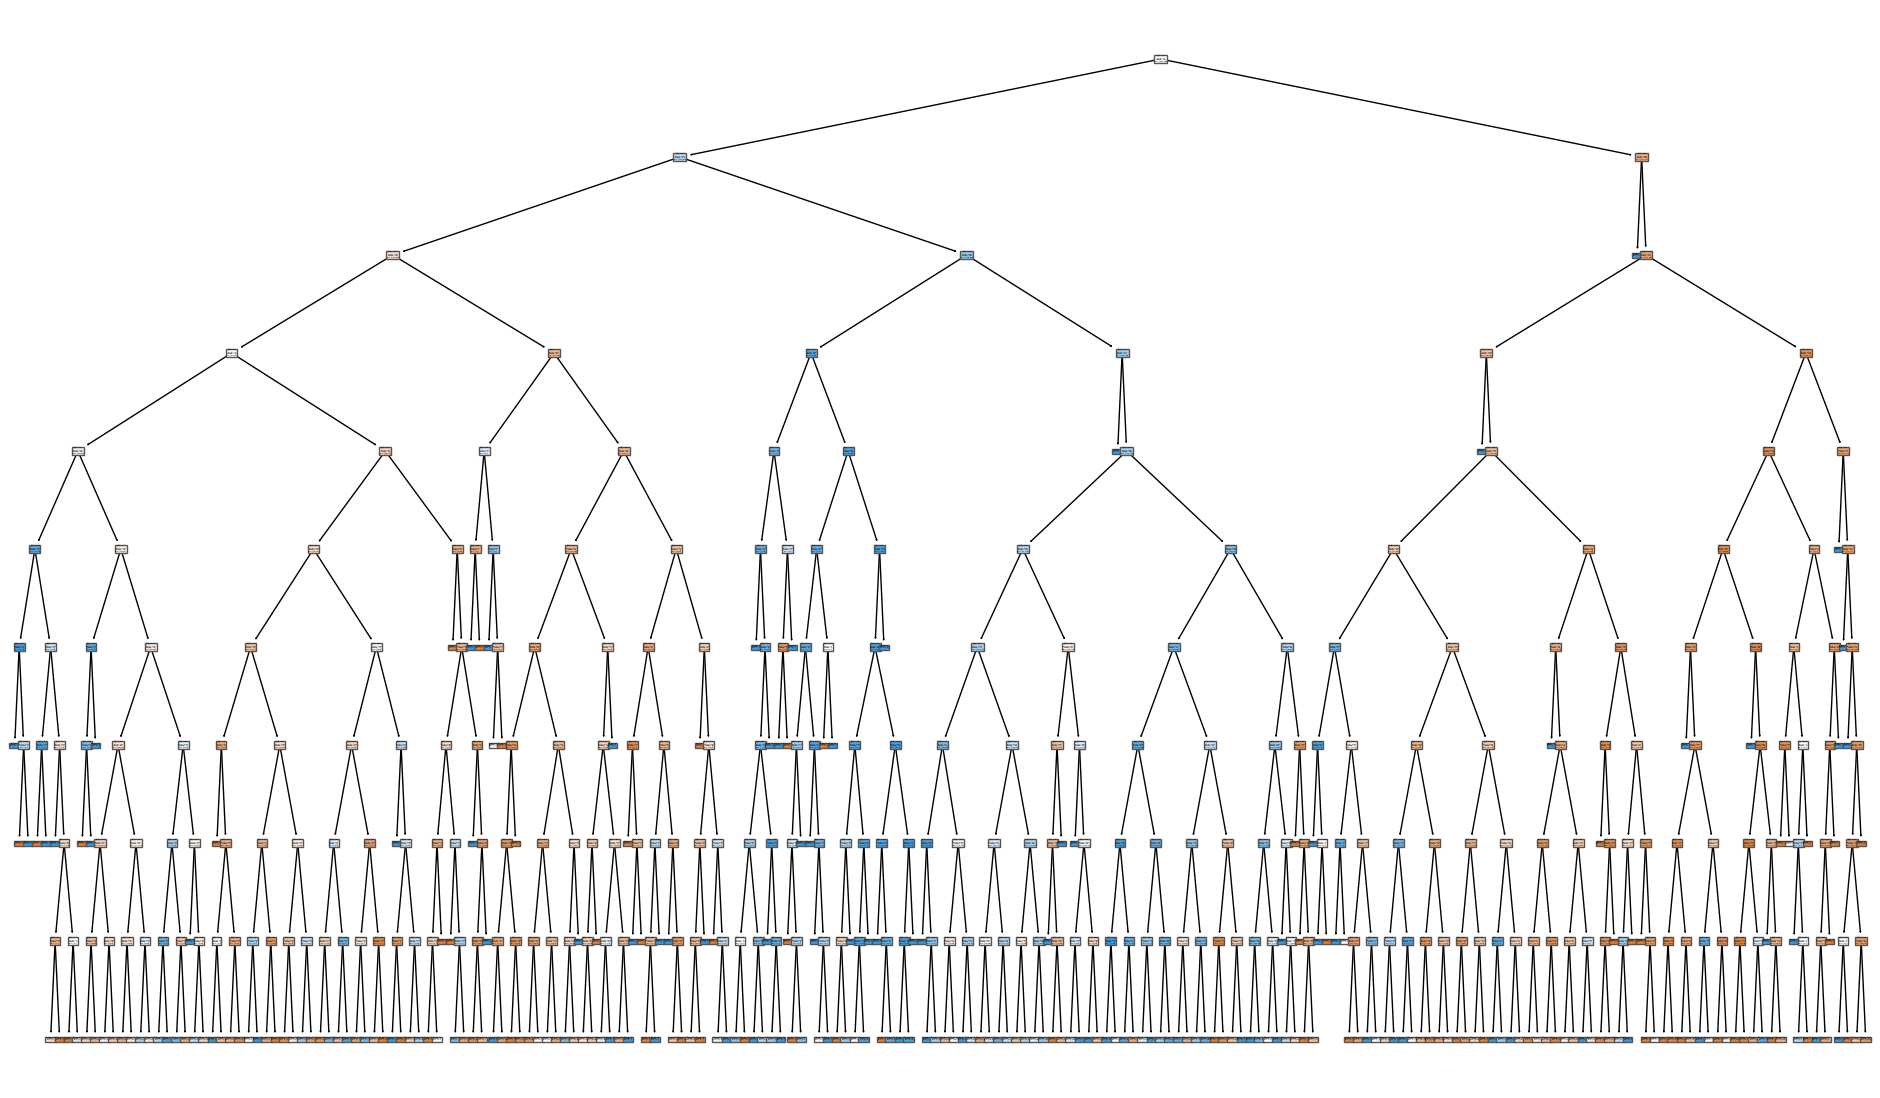

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(24,14))
plot_tree(Decision_Tree, filled=True)

# Conclusion by using Hyperparameter Tuning Decision Tree Classifier:

From the above output of Hyperparameter Tuning Decision Tree Classifier we have following results:

Accuracy for decision tree clissifier is 0.68, Precision is 0.71, Recall is 0.68 and f1-score is 0.67.

Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})

Best CV score from tree is 0.7315.

# 3.  Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1=rf_clf.predict(x_test)

In [ ]:
y_pred1

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1110
           1       0.78      0.74      0.76      1123

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [ ]:
score=roc_auc_score(y_test,y_pred1)
score

0.7627734591225241

In [ ]:
scores = cross_val_score(rf_clf,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.67736262 0.5052786  0.58809898 0.65951378 0.64512937]
Cross validation Score: 0.6150766680939987
Std : 0.06251523473557137


# Conclusion by using Random Forest Classifier:

From the above output of Random Forest Classifier we have following results:

Accuracy for decision tree clissifier is 0.77, Precision is 0.77, Recall is 0.77 and f1-score is 0.77.

ROC and AUC score is 0.7685.

Cross validation score is 0.6165.

# Hyperparameter Tuning for Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(X) for X in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(X) for X in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators= 1200, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap= False)
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1110
           1       0.76      0.76      0.76      1123

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [ ]:
score=roc_auc_score(y_test,y_predict)
score

0.7635387836634497

In [ ]:
scores = cross_val_score(rf_clf2,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.68719281 0.53852438 0.6040288  0.68292626 0.66406158]
Cross validation Score: 0.6353467646891129
Std : 0.0568009690129379


# Conclusion by using Hyperparameter Tuning Random Forest Classifier:

From the above output of Hyperparameter Tuning Decision Tree Classifier we have following results:

Accuracy is 0.77, Precision is 0.77, Recall is 0.77 and f1-score is 0.77.

Best paramters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})

ROC and AUC score is 0.7653.

Cross Validation Score is 0.6360.

# 4. Using Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1110
           1       0.64      0.64      0.64      1123

    accuracy                           0.64      2233
   macro avg       0.64      0.64      0.64      2233
weighted avg       0.64      0.64      0.64      2233



In [ ]:
score=roc_auc_score(y_test,y_pred2)
score

0.6367704748381506

In [ ]:
scores = cross_val_score(svc,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.57392088 0.65205623 0.64958895 0.60897501 0.54407239]
Cross validation Score: 0.6057226906891688
Std : 0.04217520064508981


# Conclusion by using Support Vector Machine:

From the above output of Support Vector Machine we have following results:


Accuracy is 0.63, Precision is 0.63, Recall is 0.63 and f1-score is 0.63.

ROC and AUC score is 0.6261.

Cross Validation score is 0.6057.

# 5. Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3), max_iter=100,random_state=2)

model.fit(x_train,y_train) # Training the data

y_predict_proba = model.predict_proba(x_test) # Predicting the probability of class
y_predict_proba

array([[0.55309972, 0.44690028],
       [0.5887693 , 0.4112307 ],
       [0.27712196, 0.72287804],
       ...,
       [0.21576401, 0.78423599],
       [0.69580761, 0.30419239],
       [0.34883314, 0.65116686]])

In [ ]:
y_predict1 = model.predict(x_test) # Predicting for X_test

y_train_predict = model.predict(x_train) # Predicting for X_train

In [ ]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix

print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict1))

Train accuracy : 0.6786087475742648
Test accuracy : 0.696820420958352


In [ ]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1110
           1       0.69      0.73      0.71      1123

    accuracy                           0.70      2233
   macro avg       0.70      0.70      0.70      2233
weighted avg       0.70      0.70      0.70      2233



# Conclusion by using Artificial Neural Network:

From the above output of Artificial Neural Network we have following results:


Accuracy is 0.69, Precision is 0.69, Recall is 0.69 and f1-score is 0.69.

Train accuracy : 0.6845.

Test accuracy : 0.6932.

# 6.Naive-Bayes Bernoulli

In [ ]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01) #alpha is a regularization parameter # Avoid overfitting.

## fitting the model
nb.fit(x_train,y_train)

## getting the prediction
y_hat2=nb.predict(x_test)

In [ ]:
y_hat2

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.74      0.50      0.60      1110
           1       0.63      0.82      0.71      1123

    accuracy                           0.66      2233
   macro avg       0.68      0.66      0.65      2233
weighted avg       0.68      0.66      0.66      2233



# Conclusion by using Naive-Bayes Bernoulli:

From the above output of Naive-Bayes Bernoulli we have following results:

Accuracy is 0.66, Precision is 0.68, Recall is 0.66 and f1-score is 0.65.

# 7. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [ ]:
data.head()

,Product_ID,Sales_Agent,Status,Day,Month,Hour,Minute,Source_freq_encode,Location_freq_encode,Delivery_Mode_Mode-1,Delivery_Mode_Mode-2,Delivery_Mode_Mode-3,Delivery_Mode_Mode-4,Delivery_Mode_Mode-5
0,9,3,1,13,11,18,51,0.363401,0.283706,1,0,0,0,0
1,19,4,1,13,11,18,48,0.346070,0.354121,0,0,0,0,1
2,18,11,1,13,11,17,9,0.236900,0.354121,1,0,0,0,0
3,15,7,0,13,11,16,49,0.236900,0.071916,1,0,0,0,0
4,18,7,1,13,11,16,37,0.346070,0.283706,1,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=32)

In [ ]:
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
def performance(cm):
    a,b,c,d=cm.ravel()
    accuracy=(a+d)/cm.sum()
    precision=d/(d+b)
    recall=d/(d+c)
    specificity=a/(a+b)
    F1_score=(2*precision*recall)/(precision+recall)
    print('Accuracy=',accuracy)
    print('Precision=',precision)
    print('Recall=',recall)
    print('Specificity=',specificity)
    print('F1-Score=',F1_score)

In [ ]:
cm=confusion_matrix(y_test,y_predict)

In [ ]:
performance(cm)

Accuracy= 0.6936567164179105
Precision= 0.6636363636363637
Recall= 0.7713207547169811
Specificity= 0.6177121771217712
F1-Score= 0.7134380453752183


# Conclusion by using K-Nearest Neighbors:

From the above output of K-Nearest Neighbors we have following results:

Here we have considered KNeighborsClassifier as (metric='euclidean', n_neighbors=1).

Accuracy= 0.7078, Precision= 0.6721, Recall= 0.7984, Specificity= 0.6191 and F1-Score= 0.7299.

# 8. XG-Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Splitting into training and testing data for accuracy
x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=32)

In [ ]:
# Training the model

model_xgb = XGBClassifier(n_estimators=450,max_depth=17,gamma=5,learning_rate=0.01,random_state=10)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
# Predicting the model
y_predict_xgb = model_xgb.predict(x_test.values)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.7406716417910447
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1355
           1       0.75      0.72      0.73      1325

    accuracy                           0.74      2680
   macro avg       0.74      0.74      0.74      2680
weighted avg       0.74      0.74      0.74      2680



In [ ]:
print(confusion_matrix(y_test,y_predict_xgb))

[[1033  322]
 [ 373  952]]


# Conclusion by using XG Boost:

From the above output of XG Boost we have following results:

XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=5, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=0.01, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=17, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=450, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=10, ...)

Accuracy is 0.75, Precision is 0.75, Recall is 0.75 and f1-score is 0.75.

# Overall Conclusion:

# Data Analysis:


The given data is type of supervised and categorical data. The independent features are of  nominal data type and target variable is also pf nominal data type.

Most of the columns have a lot of different labels, so I compressed and merged the labels such that only the main ones were included and then used Label Encoding. The target variable is categorized into two types 'High Potential' and 'Low Potential'.

Here the given dataset has imbalanced data because target variable has imbalanced values. Hence I am using
SMOTE (Synthetic Minority Over-sampling Technique) technique for balancing the given dataset.   

For further analysis I have used algorithms to predicting the target variable as,

1. Logistic Regression

2. Decision Tree Classifier

3. Random Forest Classifier

4. Support Vector Machine (SVM)

5. Artificial Neural Nework (ANN)

6. Naive-Bayes Bernoulli

7. K-Nearest Neighbors

8. XG-Boosting (Extreme Gradient Boosting)


# Summary of conclusions:

The purpose of this project is predicting target variable as Lead Quality whether the lead should be followed or not. The company's motive is to invest in the right prospects. And hence, I divided the lead into High Potential or Low Potential.
After applying the different algorithmns, acuuracy increases drastically.

So considering the performance of all the models, we have the following table for accuracy of different models.

In [ ]:
# Preparing table for accuracy of different models:
from tabulate import tabulate

Values = [
    ["Logistic Regression", "0.68"],
    ["Decision Tree Classifier", "0.68"],
    ["Random Forest Classifier", "0.77"],
    ["Support Vector Machine", "0.63"],
    ["Artificial Neural Nework ","0.69"],
    ["Naive-Bayes Bernoulli","0.66"],
    ["K-Nearest Neighbors","0.70"],
    ["XG-Boosting","0.75"]
]

head = ["Models", "Accuracy"]

print(tabulate(Values, headers=head,tablefmt="grid"))

+--------------------------+------------+
| Models                   |   Accuracy |
+==========================+============+
| Logistic Regression      |       0.68 |
+--------------------------+------------+
| Decision Tree Classifier |       0.68 |
+--------------------------+------------+
| Random Forest Classifier |       0.77 |
+--------------------------+------------+
| Support Vector Machine   |       0.63 |
+--------------------------+------------+
| Artificial Neural Nework |       0.69 |
+--------------------------+------------+
| Naive-Bayes Bernoulli    |       0.66 |
+--------------------------+------------+
| K-Nearest Neighbors      |       0.7  |
+--------------------------+------------+
| XG-Boosting              |       0.75 |
+--------------------------+------------+


# Final Conclusion:

By observing the above values, we can take accuracy of Random Forest Classifier as 0.77 with f1-score as 0.77 and ROC-AUC score as 0.7685, which gives best performance among all the models. So we can say that Random Forest Classifier is selected as our best model.

After that, we have second highest accuracy value for XG-Boost model as 0.75 with f1-score as 0.75. Hence, we can say that the result is increases when XGBoost Classifier is used.

Also, third last accuracy value for K-Nearest Neighbors as 0.70 with f1-score as 0.7299. This model is gives good performance after Random Forest Classifier and XG_Boost models.

The project is done with the purpose of finding out the lead quality. Hence, the motive of company is to invest in the right prospects.

So at the last we can conclude that Random Forest Classifier gives best performance and therefore Random Forest Classifier should be selected as our final model for prediction purpose and performance of the model.